In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [11]:
data =pd.read_csv('/Users/akashsaha/Desktop/Coding/LLM/Scratch/Mnist/mnist_test.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data=np.array(data)
m,n=data.shape
print(m,n)

np.random.shuffle(data)


data_dev=data[:1000].T #Transpose the data
m1,n1=data_dev.shape
print(m1,n1)
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

10000 785
785 1000


In [ ]:


def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2. / 784)  # initialization for ReLU
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stability fix
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = X.shape[1]  # Number of samples
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

# Example training loop (modify to your data)
def grad_des(X, Y, iterations, learning_rate):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 10 == 0:
            epsilon = 1e-15
            log_probs = -np.log(A2[Y, np.arange(Y.size)] + epsilon)
            loss = np.sum(log_probs) / Y.size
            accuracy = np.mean(np.argmax(A2, axis=0) == Y)
            print(f"Iteration {i}: Loss = {loss:.4f} | Accuracy = {accuracy:.4f}")
    return W1, b1, W2, b2


In [14]:
W1, b1, W2, b2 = grad_des(X_train, Y_train, iterations=100, learning_rate=0.1)

Iteration 0: Loss = 2.4478 | Accuracy = 0.0858
Iteration 10: Loss = 1.7841 | Accuracy = 0.3392
Iteration 20: Loss = 1.4681 | Accuracy = 0.4688
Iteration 30: Loss = 1.2185 | Accuracy = 0.6052
Iteration 40: Loss = 1.0262 | Accuracy = 0.7191
Iteration 50: Loss = 0.8850 | Accuracy = 0.7796
Iteration 60: Loss = 0.7827 | Accuracy = 0.8038
Iteration 70: Loss = 0.7060 | Accuracy = 0.8193
Iteration 80: Loss = 0.6474 | Accuracy = 0.8342
Iteration 90: Loss = 0.6016 | Accuracy = 0.8431


In [20]:
def get_predictions(A2):
    return np.argmax(A2, 0)



def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


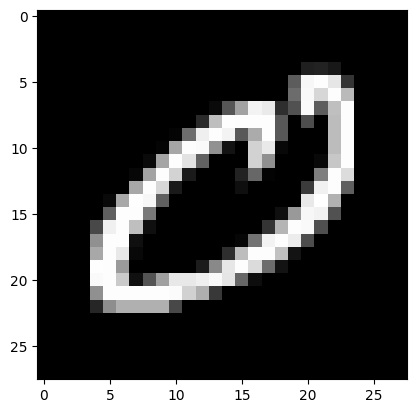

Prediction:  [2]
Label:  2


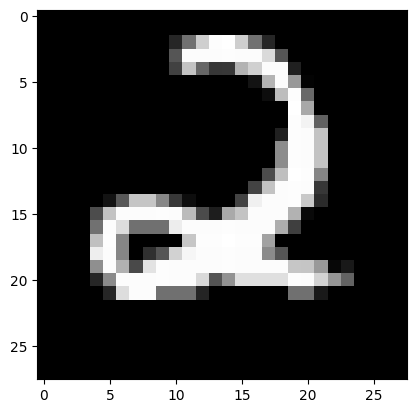

Prediction:  [1]
Label:  1


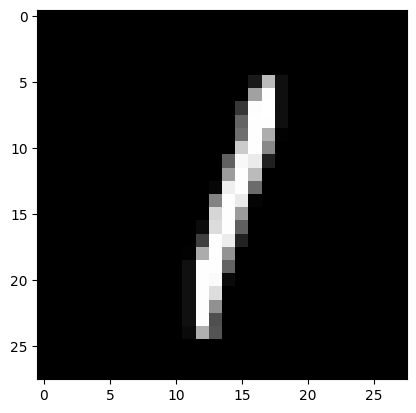

Prediction:  [4]
Label:  4


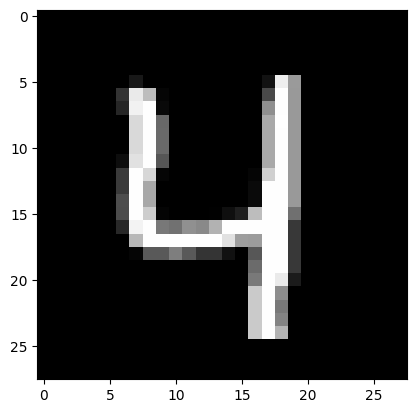

In [22]:
test_prediction(5, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(55, W1, b1, W2, b2)

In [25]:
def save_model(W1, b1, W2, b2, filename_prefix='mnist_model'):
    np.save(f'{filename_prefix}_W1.npy', W1)
    np.save(f'{filename_prefix}_b1.npy', b1)
    np.save(f'{filename_prefix}_W2.npy', W2)
    np.save(f'{filename_prefix}_b2.npy', b2)
    print("Model parameters saved successfully.")
save_model(W1, b1, W2, b2)

Model parameters saved successfully.


In [ ]:
import torch

def save_model_as_pt(W1, b1, W2, b2, filename='/Users/akashsaha/Desktop/Coding/LLM/Scratch/Mnist/mnist_model.pt'):
    # Convert NumPy arrays to PyTorch tensors
    model_dict = {
        'W1': torch.from_numpy(W1),
        'b1': torch.from_numpy(b1),
        'W2': torch.from_numpy(W2),
        'b2': torch.from_numpy(b2),
    }
    torch.save(model_dict, filename)
    print(f"Model saved as {filename}")

def load_model_from_pt(filename='mnist_model.pt'):
    model_dict = torch.load(filename)
    W1 = model_dict['W1'].numpy()
    b1 = model_dict['b1'].numpy()
    W2 = model_dict['W2'].numpy()
    b2 = model_dict['b2'].numpy()
    print(f"Model loaded from {filename}")
    return W1, b1, W2, b2
